# Finding the Best Markets to Advertise In

An e-learning company that offers courses on programming. Most of their courses are on web and mobile development, but  also cover many other domains, like data science, game development, etc. They want to promote their product and would like to invest some money in advertisement. The goal in this project is to find out the two best markets to advertise their product in.

## Understanding the Data

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey_data
pd.options.display.max_columns = 150 # to avoid truncated output 
pd.options.display.max_rows = 150

/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
survey_data.head(5)

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN                   NaN           NaN               NaN   
1                   NaN                   NaN           NaN               NaN   
2                   NaN                   NaN           NaN               NaN   
3                   NaN                   NaN           NaN               NaN   
4                   NaN                   NaN           NaN               NaN   

   CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  \
0               NaN                  NaN              NaN   
1               NaN                  NaN              NaN   
2               NaN                  1.0              NaN   
3               NaN                  NaN              NaN   
4               NaN                  NaN              NaN   

   CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  \
0                  NaN            NaN            NaN                   NaN   
1                  NaN            NaN            NaN                   NaN   
2                  1.0            NaN            NaN                   NaN   
3                  NaN            NaN            NaN                   NaN   
4                  NaN            NaN            NaN                   NaN   

   CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  \
0                  NaN                   NaN                    NaN   
1                  NaN                   NaN                    NaN   
2                  NaN                   NaN                    NaN   
3                  NaN                   NaN                    NaN   
4                  NaN                   NaN                    NaN   

   CodeEventWomenCode  CodeEventWorkshops       CommuteTime  \
0                 NaN                 NaN  15 to 29 minutes   
1                 NaN                 NaN               NaN   
2                 NaN                 NaN  15 to 29 minutes   
3                 NaN                 NaN  I work from home   
4                 NaN                 NaN               NaN   

             CountryCitizen               CountryLive  \
0                    Canada                    Canada   
1  United States of America  United States of America   
2  United States of America  United States of America   
3                    Brazil                    Brazil   
4                  Portugal                  Portugal   

               EmploymentField EmploymentFieldOther  \
0  software development and IT                  NaN   
1                          NaN                  NaN   
2  software development and IT                  NaN   
3  software development and IT                  NaN   
4                          NaN                  NaN   

                   EmploymentStatus EmploymentStatusOther  ExpectedEarning  \
0                Employed for wages                   NaN              NaN   
1  Not working but looking for work                   NaN          35000.0   
2                Employed for wages                   NaN          70000.0   

In [3]:
survey_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

Most column names are self-explanatory, but it seems that we don't have a clear documentation explaining each column name. However, you can find more information in the `raw-data` folder of the repository we mentioned above. 

## Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects the e-learning company teaches. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.

In [4]:
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"
(survey_data['JobRoleInterest'].value_counts(normalize = True) *100)

Full-Stack Web Developer                                                                                                                                                        11.770595
  Front-End Web Developer                                                                                                                                                        6.435927
  Data Scientist                                                                                                                                                                 2.173913
Back-End Web Developer                                                                                                                                                           2.030892
  Mobile Developer                                                                                                                                                               1.673341
                                                                      

From the above data:
* People are mainly interested in Web Developer escpecially Full-Stack and Front-End Developer
* Less people are interested in Mobile Developer
* Less people are interested in other domains

Interestingly, there are some people who are interested in more than one role. Let's get the number of people that are interested in a single role and in multiple roles.

* Split each string in the JobRoleInterest column to find the number of options for each participant.
    * We'll first drop the null values because we can't split Nan values.
* Generate a frequency table for the variable describing the number of options.

In [5]:
Roles_no_nulls = survey_data['JobRoleInterest'].dropna()
splitted_roles = Roles_no_nulls.str.split(',')
splitted_roles

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist,  Game Developer,    Quality...
18163    [Back-End Web Developer,  Data Engineer,    Da...
18171    [  DevOps / SysAdmin,    Mobile Developer,    ...
18174    [Back-End Web Developer,  Data Engineer,    Da...
Name: JobRoleInterest, Length: 6992, dtype: object

In [6]:
no_of_options = splitted_roles.apply(lambda x: len(x))
no_of_options.value_counts(normalize = True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

From the above, about 31.7% of the people are certain of what role they would like to study/ be in while the remaining have mixed feelings. This could be good thing for e-learning company as they offer many courses.

The focus of e-learning courses is on web and mobile development. How many people are interested in at least one of these two subjects?

In [7]:
web_or_mobile = Roles_no_nulls.str.contains('Web Developer|Mobile Developer')
web_or_mobile

1         True
2         True
3         True
4         True
6         True
         ...  
18161     True
18162    False
18163     True
18171     True
18174     True
Name: JobRoleInterest, Length: 6992, dtype: bool

In [8]:
freq_table = web_or_mobile.value_counts(normalize = True)*100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


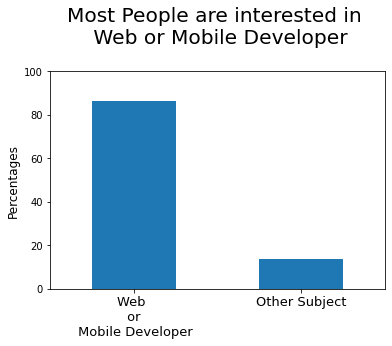

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
freq_table.plot.bar()
plt.style.use("fivethirtyeight")
plt.title('Most People are interested in \n Web or Mobile Developer', y = 1.1) # y moves the title up a bit
plt.ylabel('Percentages', fontsize = 12)
plt.xticks([0,1], ['Web \n or \n Mobile Developer', 'Other Subject'], rotation = 0, fontsize = 13)
plt.ylim(0,100)
plt.show()

From the above data, people are more interested in Web or Mebile Developer (86.2%) than those interested in other subjects (13.8%). These figures offer us a strong reason to consider this sample representative for our population of interest. The company wants to advertise courses to people interested in all programming but specifically in Web and Mobile Developer subjects/courses.

We'd like to know:
* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure we're working with a representative sample, we'll drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [10]:
# Isolate the participants that answered what role they'd be interested in
survey_data_good = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

In [11]:
# Frequency tables with absolute and relative frequencies
absolute_frequencies = survey_data_good['CountryLive'].value_counts()
relative_frequencies = survey_data_good['CountryLive'].value_counts(normalize = True)*100
print('\n ------ Absolute Frequecies ------ \n')
print(absolute_frequencies)
print('\n ------ Relative Frequecies ------\n')
print(relative_frequencies)


 ------ Absolute Frequecies ------ 

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand 

In [12]:
pd.DataFrame({'absolute_frequencies': absolute_frequencies, 'relative_frequencies':relative_frequencies})

absolute_frequencies  relative_frequencies
United States of America                       3125             45.700497
India                                           528              7.721556
United Kingdom                                  315              4.606610
Canada                                          260              3.802281
Poland                                          131              1.915765
Brazil                                          129              1.886517
Germany                                         125              1.828020
Australia                                       112              1.637906
Russia                                          102              1.491664
Ukraine                                          89              1.301550
Nigeria                                          84              1.228429
Spain                                            77              1.126060
France                                           75              1.096812
Romania                                          71              1.038315
Netherlands (Holland, Europe)                    65              0.950570
Italy                                            62              0.906698
Serbia                                           52              0.760456
Philippines                                      52              0.760456
Greece                                           46              0.672711
Ireland                                          43              0.628839
South Africa                                     39              0.570342
Mexico                                           37              0.541094
Turkey                                           36              0.526470
Hungary                                          34              0.497221
Singapore                                        34              0.497221
New Zealand                                      33              0.482597
Argentina                                        32              0.467973
Croatia                                          32              0.467973
Sweden                                           31              0.453349
Norway                                           31              0.453349
Indonesia                                        31              0.453349
Pakistan                                         31              0.453349
Denmark                                          30              0.438725
Israel                                           29              0.424101
Finland                                          29              0.424101
Egypt                                            29              0.424101
China                                            28              0.409476
Portugal                                         28              0.409476
Malaysia                                         28              0.409476
Vietnam                                          28              0.409476
Czech Republic                                   26              0.380228
Kenya                                            26              0.380228
Japan                                            24              0.350980
Bangladesh                                       23              0.336356
Lithuania                                        23              0.336356
Great Britain                                    21              0.307107
Bosnia & Herzegovina                             20              0.292483
Belarus                                          20              0.292483
United Arab Emirates                             19              0.277859
Belgium                                          19              0.277859
Nepal                                            17              0.248611
Austria                                          17              0.248611
Korea South                                      17              0.248611
Colombia                           

Based on the above results, the two markets for advertise to get potential customers would be United States of American and India as both have high relative frequencies of 45.7% and 7.72%.

We shouldn't stop the analysis here, we need to go more in depth.

## Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The e-learning company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

First, create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [13]:
# Divide the MoneyForLearning column to the MonthsProgramming column
survey_data_good['spent_per_month'] = (survey_data_good['MoneyForLearning']
                                       /survey_data_good['MonthsProgramming'].copy().replace(0,1))

In [14]:
survey_data_good['spent_per_month'].isnull().value_counts()

False    6317
True      675
Name: spent_per_month, dtype: int64

In [15]:
#Removing the nan values from spent_per_month column
survey_data_good = survey_data_good[survey_data_good['spent_per_month'].notnull()]
survey_data_good['spent_per_month']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
             ...     
18157        0.000000
18160       33.333333
18161        0.000000
18162        0.000000
18171    10000.000000
Name: spent_per_month, Length: 6317, dtype: float64

In [16]:
#Removing the nan values from CountryLive column
survey_data_good = survey_data_good[survey_data_good['CountryLive'].notnull()]

In [17]:
survey_data_good['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Next, we group the remaining data by the `CountryLive` column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [18]:
country_mean = survey_data_good.groupby('CountryLive').mean()
country_mean

Age  AttendedBootcamp  BootcampFinish  \
CountryLive                                                                  
Afghanistan                    18.750000          0.000000             NaN   
Albania                        20.666667          0.000000             NaN   
Algeria                        23.750000          0.000000             NaN   
Angola                         20.000000          0.000000             NaN   
Anguilla                       25.000000               NaN             NaN   
Argentina                      26.466667          0.000000             NaN   
Australia                      28.465347          0.068627        0.142857   
Austria                        26.500000          0.062500        0.000000   
Azerbaijan                     27.666667          0.000000             NaN   
Bahrain                        14.000000          0.000000             NaN   
Bangladesh                     24.277778          0.000000             NaN   
Belarus                        25.333333          0.000000             NaN   
Belgium                        27.705882          0.000000             NaN   
Bosnia & Herzegovina           26.050000          0.050000        1.000000   
Botswana                       23.000000          0.000000             NaN   
Brazil                         24.783784          0.000000             NaN   
Bulgaria                       25.357143          0.000000             NaN   
Cambodia                       22.000000          0.000000             NaN   
Cameroon                       21.000000          0.000000             NaN   
Canada                         26.924686          0.037657        0.625000   
Cayman Islands                 20.000000          0.000000             NaN   
Channel Islands                      NaN          0.000000             NaN   
Chile                          24.200000          0.000000             NaN   
China                          25.600000          0.000000             NaN   
Colombia                       23.142857          0.000000             NaN   
Costa Rica                     22.833333          0.000000             NaN   
Croatia                        28.692308          0.000000             NaN   
Cuba                           26.000000          0.000000             NaN   
Cyprus                         36.000000          0.000000             NaN   
Czech Republic                 23.615385          0.000000             NaN   
Denmark                        27.111111          0.000000             NaN   
Dominican Republic             24.285714          0.000000             NaN   
Ecuador                        20.500000          0.000000             NaN   
Egypt                          21.960000          0.000000             NaN   
Estonia                        24.428571          0.000000             NaN   
Finland                        29.040000          0.000000             NaN   
France                         28.129032          0.048387        0.000000   
Gambia                         28.000000          0.000000             NaN   
Georgia                        28.750000          0.000000             NaN   
Germany                        25.734513          0.026316        0.333333   
Ghana                          25.600000          0.000000             NaN   
Gibraltar                      19.000000          0.000000             NaN   
Great Britain                  29.176471          0.000000             NaN   
Greece                         26.825000          0.000000             NaN   
Guadeloupe                     32.000000          0.000000             NaN   
Guam                           26.500000          0.000000             NaN   
Guatemala                      21.000000          0.000000             NaN   
Haiti                          29.500000          0.000000             NaN   
Honduras                       28.500000          0.000000             NaN   
Hong Kong                      24.777778          0.111111 

In [19]:
country_mean['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://bit.ly/2I3cukh)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.
It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

Let's generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

In [20]:
only_4_countries = survey_data_good[survey_data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

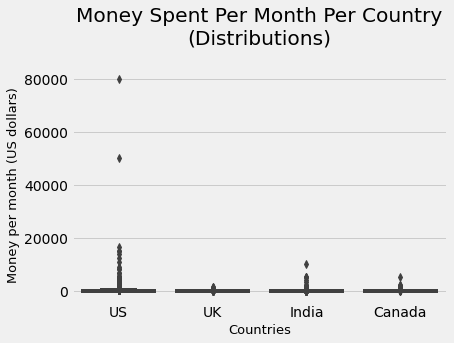

In [21]:
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = only_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)', y = 1.08)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Countries', fontsize = 13)
plt.ylabel('Money per month (US dollars)', fontsize = 13)
plt.show()

It's hard to see any differences in UK, India and Canada however for US we can immediately see that two individuals spent more than \$50000 dollars (visible outliers). This is not impossible, but very unlikely, therefore we will remove values above 20000 dollars. Let's fix this

In [22]:
survey_data_good = survey_data_good[survey_data_good['spent_per_month'] < 20000]

Let's recompute the mean values, just like we did in the previously: group the data by the `CountryLive` column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [23]:
country_mean_2 = survey_data_good.groupby('CountryLive').mean()
country_mean_2['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

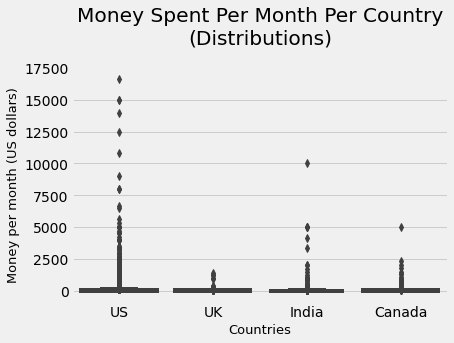

In [24]:
# # Isolate again the countries of interest and visualise distribution
only_4_countries_2 = survey_data_good[survey_data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = only_4_countries_2)
plt.title('Money Spent Per Month Per Country\n(Distributions)', y = 1.08)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Countries', fontsize = 13)
plt.ylabel('Money per month (US dollars)', fontsize = 13)
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [25]:
india_outliers = only_4_countries_2[
    (only_4_countries_2['CountryLive'] == 'India') & (only_4_countries_2['spent_per_month'] >= 2500)]

In [26]:
india_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more than 1 million   
15587                NaN             NaN            more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
1728                    NaN                   NaN           NaN   
1755                    NaN                   NaN           1.0   
7989                    1.0                   NaN           NaN   
8126                    NaN                   NaN           NaN   
13398                   NaN                   NaN           NaN   
15587                   NaN                   NaN           NaN   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
1728                1.0               NaN                  NaN   
1755                NaN               NaN                  1.0   
7989                NaN               NaN                  NaN   
8126                1.0               NaN                  1.0   
13398               NaN               NaN                  NaN   
15587               NaN               NaN                  1.0   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
1728               NaN                  NaN            NaN            NaN   
1755               1.0                  NaN            NaN            NaN   
7989               NaN                  NaN            NaN            NaN   
8126               NaN                  NaN            NaN            NaN   
13398              NaN                  NaN            1.0            NaN   
15587              NaN                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
1728                    NaN                  NaN                   NaN   
1755                    NaN                  NaN                   NaN   
7989                    NaN                  NaN                   NaN   
8126                    NaN                  NaN                   NaN   
13398                   NaN                  NaN                   NaN   
15587                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
1728                     NaN                 NaN                 NaN   
1755                     NaN                 NaN                 NaN   
7989                     NaN                 NaN                 1.0   
8126                     NaN                 NaN                 NaN   
13398                    NaN                 NaN                 NaN   
15587                    NaN                 NaN                 NaN   

            CommuteTime CountryCitizen CountryLive  \
1728                NaN          India       India   
1755                NaN          India       India   
7989   15 to 29 minutes          India       India   
8126                NaN          India       India   
13398               NaN          India       India   
15587  15 to 29 minutes          India       India   

                   EmploymentField Emp

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [27]:
# Remove the outliers for India
only_4_countries_2 = only_4_countries_2.drop(india_outliers.index) # using the row labels

In [28]:
only_4_countries_2

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1      34.0               0.0             NaN                NaN          NaN   
2      21.0               0.0             NaN                NaN          NaN   
6      29.0               0.0             NaN                NaN          NaN   
15     32.0               0.0             NaN                NaN          NaN   
16     29.0               0.0             NaN                NaN          NaN   
...     ...               ...             ...                ...          ...   
18107  35.0               0.0             NaN                NaN          NaN   
18111  30.0               0.0             NaN                NaN          NaN   
18113  24.0               0.0             NaN                NaN          NaN   
18130  23.0               0.0             NaN                NaN          NaN   
18156  29.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1                    NaN             NaN              less than 100,000   
2                    NaN             NaN            more than 1 million   
6                    NaN             NaN  between 100,000 and 1 million   
15                   NaN             NaN              less than 100,000   
16                   NaN             NaN  between 100,000 and 1 million   
...                  ...             ...                            ...   
18107                NaN             2.0              less than 100,000   
18111                NaN             1.0            more than 1 million   
18113                NaN             2.0  between 100,000 and 1 million   
18130                NaN             1.0  between 100,000 and 1 million   
18156                NaN             1.0  between 100,000 and 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
1                       NaN                   NaN           NaN   
2                       NaN                   NaN           NaN   
6                       1.0                   NaN           NaN   
15                      NaN                   NaN           NaN   
16                      NaN                   NaN           NaN   
...                     ...                   ...           ...   
18107                   NaN                   NaN           NaN   
18111                   NaN                   NaN           1.0   
18113                   NaN                   NaN           NaN   
18130                   NaN                   NaN           NaN   
18156                   NaN                   NaN           NaN   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
1                   NaN               NaN                  NaN   
2                   NaN               NaN                  1.0   
6                   NaN               NaN                  NaN   
15                  NaN               NaN                  NaN   
16                  NaN               NaN                  NaN   
...                 ...               ...                  ...   
18107               NaN               NaN                  NaN   
18111               NaN               NaN                  NaN   
18113               NaN               1.0                  NaN   
18130               NaN               NaN                  1.0   
18156               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
1                  NaN                  NaN            NaN            NaN   
2                  NaN                  1.0            NaN            NaN   
6                  1.0                  NaN            NaN            NaN   
15                 NaN                  NaN            NaN            NaN   
16                 NaN                  NaN            NaN            NaN   
...                ...                  ...            ...            ... 

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [29]:
us_outliers = only_4_countries_2[
    (only_4_countries_2['CountryLive'] == 'United States of America') & (only_4_countries_2['spent_per_month'] >= 6000)]

In [30]:
us_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT                1.0   
3930                                      NaN                NaN   
6805                                 Sabio.la                0.0   
7198                                      NaN                NaN   
7505                                   Codeup                0.0   
9778                             Grand Circus                1.0   
16650                                     NaN                NaN   
16997                                     NaN                NaN   
17231                                     NaN                NaN   

       ChildrenNumber                 CityPopulation  CodeEventConferences  \
718               NaN            more than 1 million                   1.0   
1222              NaN  between 100,000 and 1 million                   NaN   
3184              NaN            more than 1 million                   NaN   
3930              NaN  between 100,000 and 1 million                   NaN   
6805              NaN  between 100,000 and 1 million                   NaN   
7198              NaN            more than 1 million                   1.0   
7505              NaN            more than 1 million                   NaN   
9778              NaN  between 100,000 and 1 million                   NaN   
16650             2.0            more than 1 million                   NaN   
16997             1.0            more than 1 million                   NaN   
17231             2.0              less than 100,000                   NaN   

       CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  \
718                     NaN           NaN               NaN               NaN   
1222                    NaN           NaN               NaN               NaN   
3184                    NaN           NaN               NaN               NaN   
3930                    NaN           NaN               NaN               NaN   
6805                    NaN           NaN               NaN               NaN   
7198                    NaN           NaN               NaN               NaN   
7505                    NaN           NaN               NaN               NaN   
9778                    NaN           NaN               NaN               NaN   
16650                   NaN           NaN               NaN               NaN   
16997                   NaN           NaN               NaN               NaN   
17231                   NaN           NaN               NaN               NaN   

       CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  \
718                    NaN              NaN                  NaN   
1222                   NaN              1.0                  NaN   
3184                   NaN              1.0                  NaN   
3930                   NaN              NaN                  NaN   
6805                   NaN              NaN                  NaN   
7198                   NaN              1.0             

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend ($)6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove these eight outliers.

In the next code block, we'll remove respondents that:
* Didn't attend bootcamps.
* Had been programming for three months or less when at the time they completed the survey.

In [31]:
# Remove the respondents who didn't attendent a bootcamp

no_bootcamp = only_4_countries_2[
    (only_4_countries_2['CountryLive'] == 'United States of America') & 
    (only_4_countries_2['spent_per_month'] >= 6000) &
    (only_4_countries_2['AttendedBootcamp'] == 0.0)
]

only_4_countries_2 = only_4_countries_2.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months

programming_3_months = only_4_countries_2[
    (only_4_countries_2['CountryLive'] == 'United States of America') & 
    (only_4_countries_2['spent_per_month'] >= 6000) &
    (only_4_countries_2['MonthsProgramming'] <= 3.0)
]

only_4_countries_2 = only_4_countries_2.drop(programming_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [32]:
canada_outliers = only_4_countries_2[
    (only_4_countries_2['CountryLive'] == 'Canada') & (only_4_countries_2['spent_per_month'] > 4500)]

In [33]:
canada_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
13659                   1.0                   NaN           1.0   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
13659               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
13659              1.0                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
13659                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
13659                    NaN                 NaN                 1.0   

            CommuteTime CountryCitizen CountryLive EmploymentField  \
13659  30 to 44 minutes         Canada      Canada         finance   

      EmploymentFieldOther    EmploymentStatus EmploymentStatusOther  \
13659                  NaN  Employed for wages                   NaN   

       ExpectedEarning  FinanciallySupporting  FirstDevJob Gender GenderOther  \
13659          60000.0                    NaN          NaN   male         NaN   

       HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  \
13659          NaN      1.0                     0.0                 1.0   

       HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  \
13659              1.0                  0.0             0.0         250000.0   

       HoursLearning                              ID.x  \
13659           10.0  739b584aef0541450c1f713b82025181   

                                   ID.y    Income  IsEthnicMinority  \
13659  28381a455ab25cc2a118d78af44d8749  140000.0               1.0   

       IsReceiveDisabilitiesBenefits  IsSoftwareDev  IsUnderEmployed  \
13659                            1.0            0.0              0.0   

            JobApplyWhen  JobInterestBackEnd  JobInterestDataEngr  \
13659  I haven't decided                 1.0                  NaN   

       JobInterestDataSci  JobInterestDevOps  JobInterestFrontEnd  \
13659                 1.0                NaN                  1.0   

       JobInterestFullStack  JobInterestGameDev  JobInterestInfoSec  \
13659                   1.0                 1.0                 NaN   

       JobInterestMobile JobInterestOther  JobInterestProjMngr  \
13659                1.0              NaN                  1.0   

       JobInterestQAEngr  JobInterestUX                               JobPref  \
13659                NaN            1.0  work for a multinational corporation   

       JobRelocateYesNo                                    JobRoleInterest  \
13659               NaN    Mobile Developer, Full-Stack Web Developer, ...   

      JobWherePref           LanguageAtHome          MaritalStatus  \
13659    from home  Yue (Cantonese) Chinese  single, never married   

       MoneyForLearning  MonthsProgramming   NetworkID         Part1EndTime  \
13659           10000.0                2.0  41c26f2932  2017-03-25 23:23:03   

            Part1StartTime         Part2EndTime       Part2StartTime  \
13659  2017-03-25 23:20:33  2017-03-25 23:24:34  2017-03-25 23:23:06   

       PodcastChangeLog  PodcastCodeNewbie  PodcastCodePen  PodcastDevTea  \
13659               NaN                NaN             NaN            NaN   

       PodcastDotNET  PodcastGiantRobots  PodcastJSAir  PodcastJSJabber  \
13659            NaN                 NaN           NaN              NaN   

       PodcastNone PodcastOther  PodcastProgThrowdown  PodcastRubyRogues  \
13659          1.0          NaN                   NaN                NaN   

       PodcastSEDaily  PodcastSERadio  PodcastShopTal

Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [34]:
# Remove the extreme outliers for Canada
only_4_countries_2 = only_4_countries_2.drop(canada_outliers.index)

In [35]:
only_4_countries_2.groupby('CountryLive').mean()['spent_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: spent_per_month, dtype: float64

Let's recompute the mean values and generate the final box plots.

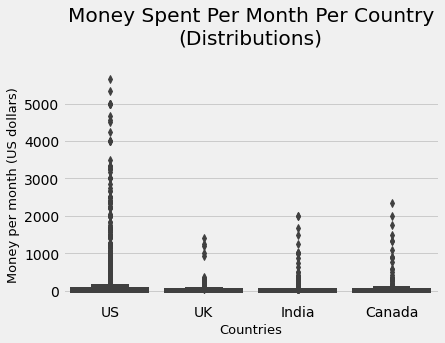

In [36]:
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = only_4_countries_2)
plt.title('Money Spent Per Month Per Country\n(Distributions)', y = 1.08)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Countries', fontsize = 13)
plt.ylabel('Money per month (US dollars)', fontsize = 13)
plt.show()

## Choosing the Two Best Markets

After eliminating the extreme outliers, we found the following mean values as seen above. Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

Remember that the e-leraning company sell subscriptions is at a price of 59 US dolloars per month. It does make sense to advertise in two countries with Canada being the second country as Canada's average money spent per month is 93 US dollars, they will be more likely to spend the subscription fee. The case can also be said for India (India might actually be a better choice because of the large number of potential customers).

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
     * 60% for the US, 25% for India, 15% for Canada.
     * 50% for the US, 30% for India, 20% for Canada; etc.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    * 70% for the US, and 30% for India.
    * 65% for the US, and 35% for Canada; etc.
3. Advertise only in the US.

It would it be better to just send the  marketing team at the company our results and let them use their domain knowledge to take the best decision.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.